#VIA on scRNA-seq Human Hematopoiesis

In [1]:
import pyVIA.core as via
#import core_working as via
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###Load the data and use the annotations derived from SingleR Novershtern reference data

We use annotations given by SingleR which uses Novershtern Hematopoietic cell data as the reference. These are in line with the annotations given by Setty et al., 2019 but offer a slightly more granular annotation.

In [2]:
# 5780 cells x 14651 genes Human Replicate 1. Male african american, 38 years
ad = sc.read( '/home/shobi/Trajectory/Datasets/HumanCD34/human_cd34_bm_rep1.h5ad')

nover_labels = pd.read_csv('/home/shobi/Trajectory/Datasets/HumanCD34/Nover_Cor_PredFine_notLogNorm.csv')['x'].values.tolist()
dict_abb = {'Basophils': 'BASO1', 'CD4+ Effector Memory': 'TCEL7', 'Colony Forming Unit-Granulocytes': 'GRAN1',
            'Colony Forming Unit-Megakaryocytic': 'MEGA1', 'Colony Forming Unit-Monocytes': 'MONO1',
            'Common myeloid progenitors': "CMP", 'Early B cells': "PRE_B2", 'Eosinophils': "EOS2",
            'Erythroid_CD34- CD71+ GlyA-': "ERY2", 'Erythroid_CD34- CD71+ GlyA+': "ERY3",
            'Erythroid_CD34+ CD71+ GlyA-': "ERY1", 'Erythroid_CD34- CD71lo GlyA+': 'ERY4',
            'Granulocyte/monocyte progenitors': "GMP", 'Hematopoietic stem cells_CD133+ CD34dim': "HSC1",
            'Hematopoietic stem cells_CD38- CD34+': "HSC2",
            'Mature B cells class able to switch': "B_a2", 'Mature B cells class switched': "B_a4",
            'Mature NK cells_CD56- CD16- CD3-': "Nka3", 'Monocytes': "MONO2",
            'Megakaryocyte/erythroid progenitors': "MEP", 'Myeloid Dendritic Cells': 'mDC (cDC)', 'Naïve B cells': "B_a1",
            'Plasmacytoid Dendritic Cells': "pDC", 'Pro B cells': 'PRE_B3'}
#NOTE: Myeloid DCs are now called Conventional Dendritic Cells cDCs 
nover_labels = [dict_abb[i] for i in nover_labels]
for i in list(set(nover_labels)):
    print('Cell type', i, 'has ', nover_labels.count(i), 'cells')
tsnem = ad.obsm['tsne']
adata_counts = sc.AnnData(ad.X)  # ad.X is filtered, lognormalized,scaled// whereas ad.raw.X is the filtered but not pre-processed
adata_counts.obs_names = ad.obs_names
adata_counts.var_names = ad.var_names
sc.tl.pca(adata_counts, svd_solver='arpack', n_comps=200)
true_label = nover_labels 

Cell type MEP has  339 cells
Cell type Nka3 has  5 cells
Cell type mDC (cDC) has  96 cells
Cell type MONO1 has  186 cells
Cell type B_a1 has  27 cells
Cell type EOS2 has  3 cells
Cell type B_a2 has  1 cells
Cell type PRE_B2 has  515 cells
Cell type B_a4 has  8 cells
Cell type ERY3 has  104 cells
Cell type ERY4 has  53 cells
Cell type HSC1 has  2365 cells
Cell type TCEL7 has  1 cells
Cell type pDC has  204 cells
Cell type BASO1 has  2 cells
Cell type PRE_B3 has  2 cells
Cell type ERY2 has  40 cells
Cell type MEGA1 has  12 cells
Cell type GMP has  28 cells
Cell type HSC2 has  10 cells
Cell type MONO2 has  35 cells
Cell type ERY1 has  773 cells
Cell type GRAN1 has  3 cells
Cell type CMP has  968 cells


### Run VIA (first iteration for coarse grained view).
It should be noted that VIA can be run in two iterations where the first iteration is a coarser (larger clusters) analysis which is useful to get a more concise list of terminal states and high-level overview of the trajectory. A second more fine-grained (smaller clusters) run can be subsequently conducted which uses the terminal states (lineages) detected in the initial run and refines the overall pseudotime and lineage probabilities. 

Good results can be achieved by using either the single run approach (where the solo run can be as fine or coarse grained as desired) or using the two-run approach. It is a matter of data size, characteristics and can be left to the user's discretion. 
All visualizations and analysis of genes, lineage pathways and so on can be extracted after a single run, as well as after a two-run approach. 



2022-02-16 13:56:40.100631	Running VIA over input data of 5780 (samples) x 100 (features)


2022-02-16 13:56:41.651776	Global pruning of weighted knn graph


2022-02-16 13:56:43.600452	Finished global pruning. Kept 45.79 of edges. 


number of components in the original full graph 1
for downstream visualization purposes we are also constructing a low knn-graph 


size neighbor array in low-KNN in pca-space for visualization (5780, 4)
2022-02-16 13:56:47.773452	Commencing community detection


2022-02-16 13:56:48.065779	Finished running Leiden algorithm. Found 162 clusters.
2022-02-16 13:56:48.068356	Merging 145 very small clusters (<10)
2022-02-16 13:56:48.071363	Finished detecting communities. Found 17 communities
2022-02-16 13:56:48.071972	Making cluster graph. Global cluster graph pruning level: 0.15
2022-02-16 13:56:48.094665	Graph has 1 connected components before pruning
2022-02-16 13:56:48.096576	Graph has 1 connected components after reconnecting
2022-02-16 13:56:48.096832	0.0% links trimmed from local pruning relative to start
2022-02-16 13:56:48.096870	63.2% links trimmed from global pruning relative to start
2022-02-16 13:56:48.126057	The root index, 4823 provided by the user belongs to cluster number 2                                  and corresponds to cell type HSC1
2022-02-16 13:56:48.129563	Computing lazy-teleporting expected hitting times


ended all multiprocesses, will retrieve and reshape
2022-02-16 13:56:48.736380	Identifying terminal clusters corresponding to unique lineages...
2022-02-16 13:56:48.736563	Closeness:[5, 6, 7, 9, 11, 16]
2022-02-16 13:56:48.736604	Betweenness:[2, 5, 7, 9, 11, 12, 13, 14, 16]
2022-02-16 13:56:48.736633	Out Degree:[4, 5, 6, 8, 9, 11, 13, 14, 16]
TS 6 had 3 or more neighboring terminal states, namely [7, 9, 16]  and so we removed, 7
2022-02-16 13:56:48.739924	Terminal clusters corresponding to unique lineages in this component are [5, 6, 9, 11, 13, 14, 16] 


From root 2  to Terminal state 5 is found 7  times.


From root 2  to Terminal state 6 is found 52  times.


From root 2  to Terminal state 9 is found 40  times.


From root 2  to Terminal state 11 is found 80  times.


From root 2  to Terminal state 13 is found 500  times.


From root 2  to Terminal state 14 is found 500  times.


From root 2  to Terminal state 16 is found 36  times.
2022-02-16 13:56:50.474428	Terminal clusters corresponding to unique lineages are [5, 6, 9, 11, 13, 14, 16] 
2022-02-16 13:56:50.474588	Begin projection of pseudotime and lineage likelihood


2022-02-16 13:56:51.822198	Graph has 1 connected components before pruning
2022-02-16 13:56:51.826093	Graph has 1 connected components after reconnecting
2022-02-16 13:56:51.826258	53.7% links trimmed from local pruning relative to start
2022-02-16 13:56:51.826292	71.6% links trimmed from global pruning relative to start


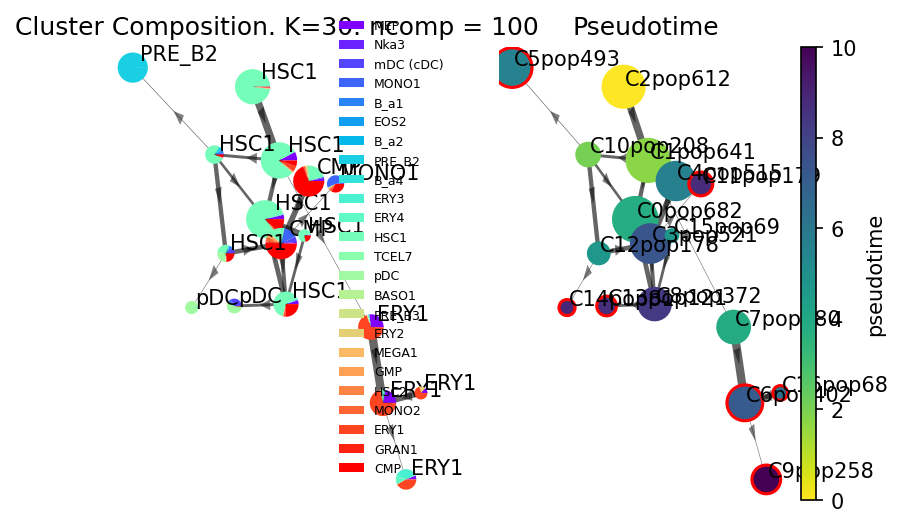

time elapsed 12.6 seconds


In [3]:
ncomps=100#80
knn=30
v0_random_seed=4
root_user = [4823] #the index of a cell belonging to the HSC cell type
dataset = '' 

'''
#Note, if you decide to choose a cell type as a root, then you need to set the dataset as 'group'
#root_user=['HSC1']
#dataset = 'group'# 'humanCD34'
'''

v0 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
     too_big_factor=0.3,     root_user=root_user, dataset=dataset, preserve_disconnected=True, random_seed=v0_random_seed,
is_coarse=True,pseudotime_threshold_TS=20, neighboring_terminal_states_threshold=3)

v0.run_VIA()

### View the gene expression along the VIA graph. We use the computed HNSW small world graph in VIA to accelerate the gene imputation calculations (using similar approach to MAGIC) as follows:

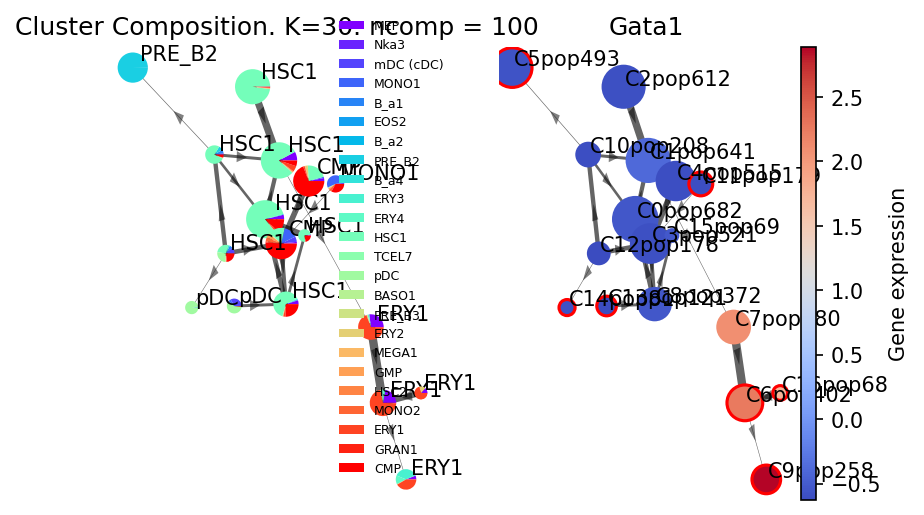

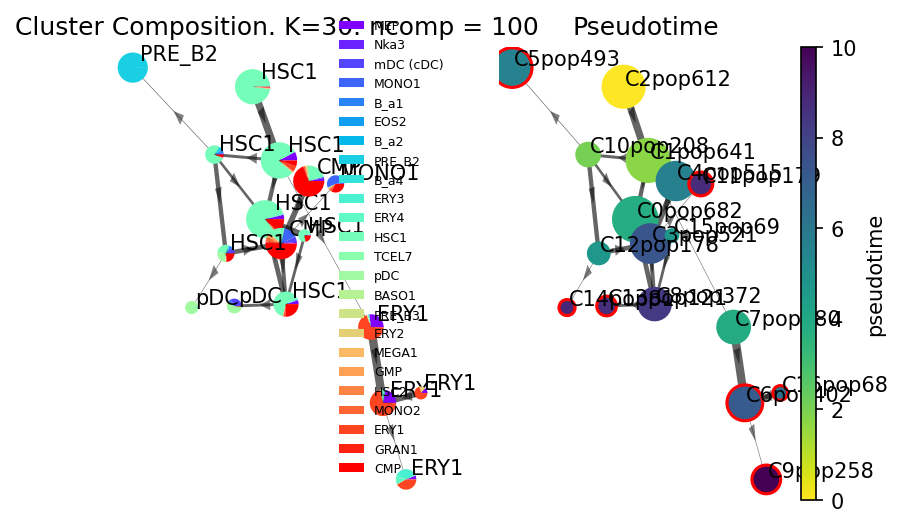

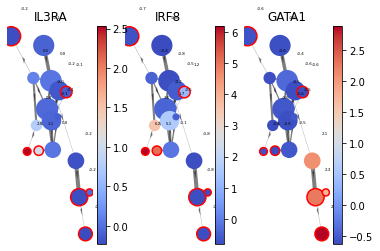

In [4]:
df_ = pd.DataFrame(ad.X)
df_.columns = [i for i in ad.var_names]

gene_list_magic = ['IL3RA', 'IRF8', 'GATA1', 'GATA2', 'ITGA2B', 'MPO', 'CD79B', 'SPI1', 'CD34', 'CSF1R', 'ITGAX']
df_magic = v0.do_impute(df_, magic_steps=3, gene_list=gene_list_magic)
df_magic['parc'] = v0.labels
df_magic_cluster = df_magic.groupby('parc', as_index=True).mean()

# Draw_piechart plots both the cell type composition as well as a clustergraph colored by pseudotime or gene expression
v0.draw_piechart_graph(type_data='gene', gene_exp=df_magic_cluster['GATA1'].values, title='Gata1')
v0.draw_piechart_graph(type_data='pt', title='pseudotime')

# Draw_clustergraph does not plot the pie-graph clutsergraph and accepts a dataframe as input. Here we plot just the first three genes in the gene_list_magic list
via.draw_clustergraph(via_coarse=v0, type_data='gene', gene_exp=df_magic_cluster, gene_list=gene_list_magic[0:3], arrow_head_w=0.1)


### Visualize the overall VIA trajectory projected onto a 2D embedding (UMAP, Phate, TSNE etc) in two ways. 
#### 1. The first draws the high-level clustergraph abstraction onto the embedding;
#### 2. The second draws a vector plot of the more fine-grained directionality of cells along the trajectory projected onto an embedding. 

dict of terminal state pairs, Super: sub:  {}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 5 is a super terminal with sub_terminal cluster 5
super cluster 6 is a super terminal with sub_terminal cluster 6
super cluster 9 is a super terminal with sub_terminal cluster 9
super cluster 11 is a super terminal with sub_terminal cluster 11
super cluster 13 is a super terminal with sub_terminal cluster 13
super cluster 14 is a super terminal with sub_terminal cluster 14
super cluster 16 is a super terminal with sub_terminal cluster 16


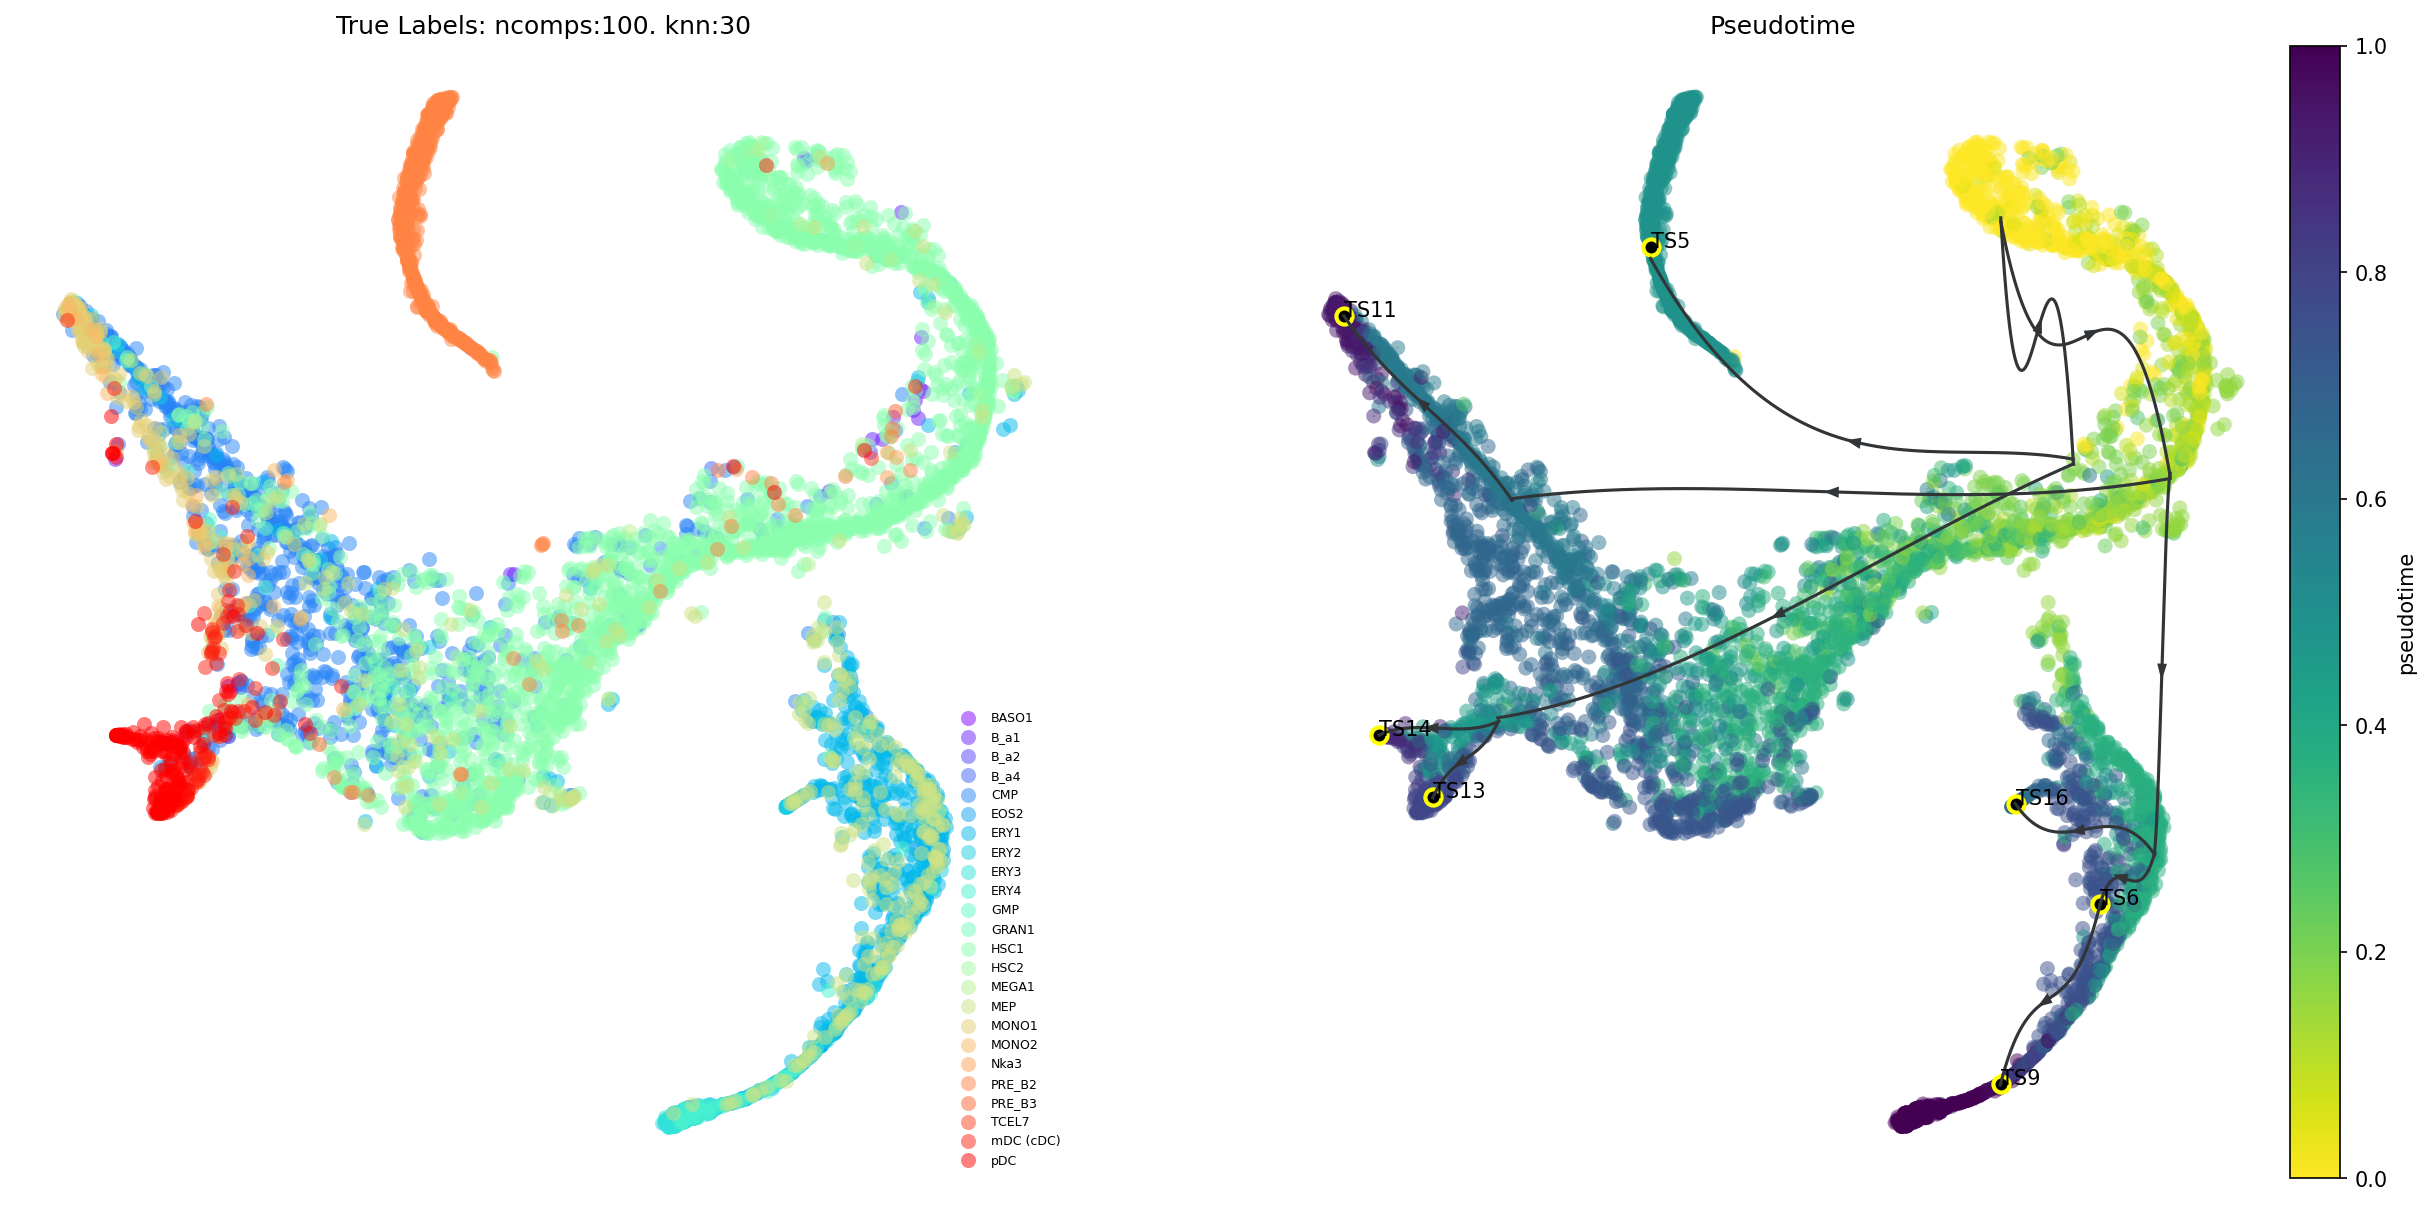

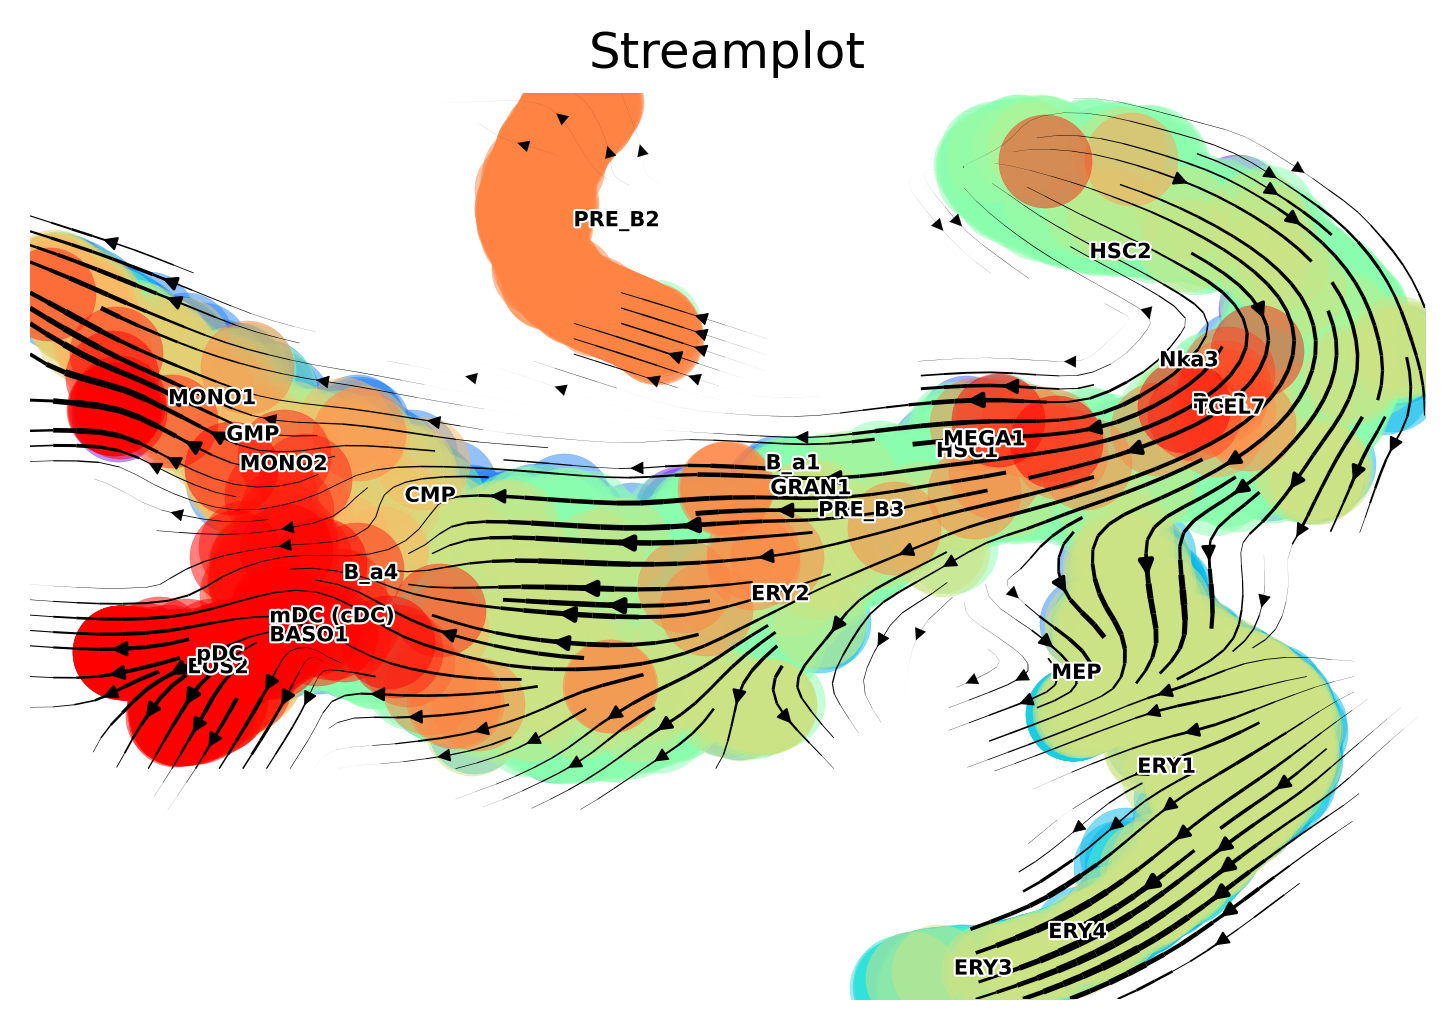

In [7]:
via.draw_trajectory_gams(via_coarse=v0,via_fine= v0,embedding=tsnem, draw_all_curves=False)
via.via_streamplot(via_coarse=v0, embedding=tsnem)


'''
##In case we are unable to do a tsne/umap of our entire dataset due to high runtime, it is possible to visualize Via (run on the full dataset) on a subset of cells used for visualization. One simply has to retain the indexes of the cells used for the embedding 
##by changing "size" to a number less than len(labels), you can choose to compute your embedding on just idx samples
idx = np.random.randint(len(v0.labels), size=len(v0.labels)) 

via.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx, draw_all_curves=False)

##visualizeLINEAGE EVOLUTION PATHS when only a subset of the embedding points are available

via.draw_sc_evolution_trajectory_dijkstra(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx)
'''

### Visualize the probabilistic pathways from root to terminal state as indicated by the lineage likelihood. The higher the linage likelihood, the greater the potential of that particular cell to differentiate towards the terminal state of interest. 

Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 5 : [2, 1, 10, 5]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 6 : [2, 1, 7, 6]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 9 : [2, 1, 7, 6, 9]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 11 : [2, 1, 0, 8, 3, 11]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 13 : [2, 1, 0, 8, 13]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 14 : [2, 1, 10, 12, 14]
Cluster path on clustergraph starting from Root Cluster 2 to Terminal Cluster 16 : [2, 1, 7, 6, 16]
2022-02-16 13:57:43.229007	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 1 along path: [2, 2, 2, 2, 1]
2022-02-16 13:57:43.259740	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 2 along path: [2]


2022-02-16 13:57:43.299629	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 3 along path: [2, 2, 2, 2, 0, 3, 3, 3]
2022-02-16 13:57:43.341099	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 4 along path: [2, 2, 2, 2, 1, 4, 4, 4, 4]
2022-02-16 13:57:43.380349	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 5 along path: [2, 2, 2, 2, 10, 5, 5, 5, 5, 5, 5]
2022-02-16 13:57:43.418281	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 6 along path: [2, 2, 2, 2, 7, 6, 6, 6]
2022-02-16 13:57:43.450224	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 7 along path: [2, 2, 2, 1, 7, 6, 6]


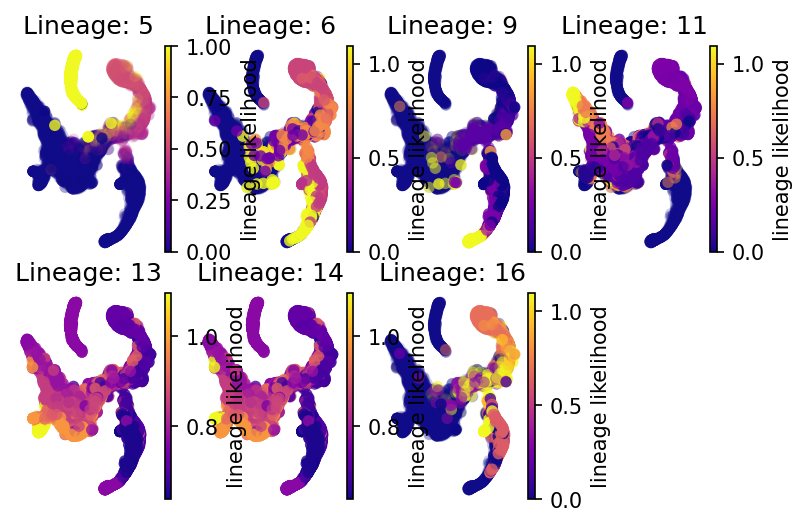

In [6]:
via.draw_sc_lineage_probability(via_coarse=v0,via_fine= v0, embedding=tsnem)

### The gene dynamics along pseudotime for all detected lineages are automatically inferred by VIA. These can be interpreted as the change in gene expression along any given lineage.

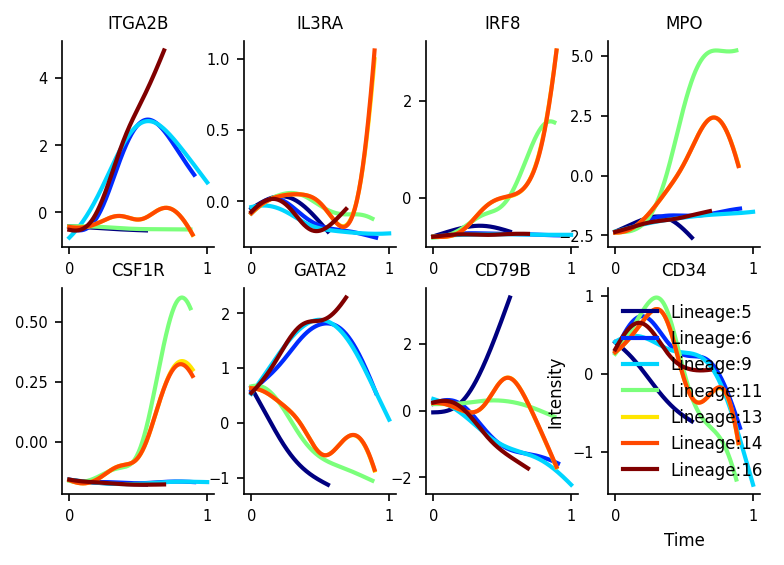

In [14]:
gene_name_dict = {'GATA1': 'GATA1', 'GATA2': 'GATA2', 'ITGA2B': 'CD41 (Mega)', 'MPO': 'MPO (Mono)',
                      'CD79B': 'CD79B (B)', 'IRF8': 'IRF8 (DC)', 'SPI1': 'PU.1', 'CD34': 'CD34',
                      'CSF1R': 'CSF1R (cDC Up. Up then Down in pDC)', 'IL3RA': 'CD123 (pDC)', 'IRF4': 'IRF4 (pDC)',
                      'ITGAX': 'ITGAX (cDCs)', 'CSF2RA': 'CSF2RA (cDC)'}
adata_counts_raw = sc.AnnData(ad.raw.X) #raw counts
adata_counts_raw.var_names = [i for i in ad.var_names]
df_ = pd.DataFrame(adata_counts_raw.X.todense())

df_.columns = [i for i in adata_counts_raw.var_names]
marker_genes =[ 'ITGA2B', 'IL3RA',      'IRF8',   'MPO', 'CSF1R', 'GATA2', 'CD79B',             'CD34']
v0.get_gene_expression(df_magic[marker_genes])

### We show how to run a second iteration and link it to the first. 
In this case, our second iteration would have a finer grained clustering to refine the pseudotime and lineage probabilities but use the terminal lineage states detected in the coarser run (v0).
The main difference is that we reduce the too_big_factor and we set via_coarse = v0

2022-02-16 14:02:16.933363	Running VIA over input data of 5780 (samples) x 100 (features)


2022-02-16 14:02:18.303387	Global pruning of weighted knn graph


2022-02-16 14:02:18.979743	Finished global pruning. Kept 45.79 of edges. 
2022-02-16 14:02:18.979854	Commencing community detection


2022-02-16 14:02:19.263885	Finished running Leiden algorithm. Found 162 clusters.
2022-02-16 14:02:19.265311	Found 9 clusters that are too big
inside handle too big
2022-02-16 14:02:19.265399	Cluster 7 contains 380>289 samples and is too big
inside handle too big
2022-02-16 14:02:19.334498	Cluster 2 contains 554>289 samples and is too big
inside handle too big
2022-02-16 14:02:19.454839	Cluster 8 contains 372>289 samples and is too big


inside handle too big
2022-02-16 14:02:19.517937	Cluster 6 contains 402>289 samples and is too big
inside handle too big
2022-02-16 14:02:19.587570	Cluster 1 contains 584>289 samples and is too big
inside handle too big
2022-02-16 14:02:19.707357	Cluster 0 contains 653>289 samples and is too big


inside handle too big
2022-02-16 14:02:19.848005	Cluster 3 contains 517>289 samples and is too big
inside handle too big
2022-02-16 14:02:19.944048	Cluster 4 contains 513>289 samples and is too big
inside handle too big
2022-02-16 14:02:20.039575	Cluster 5 contains 492>289 samples and is too big


2022-02-16 14:02:20.141614	Merging 145 very small clusters (<10)
2022-02-16 14:02:20.144694	Finished detecting communities. Found 51 communities
2022-02-16 14:02:20.145240	Making cluster graph. Global cluster graph pruning level: 0.15
2022-02-16 14:02:20.214830	Graph has 1 connected components before pruning
2022-02-16 14:02:20.218009	Graph has 1 connected components after reconnecting
2022-02-16 14:02:20.218201	2.6% links trimmed from local pruning relative to start
2022-02-16 14:02:20.218232	70.0% links trimmed from global pruning relative to start
2022-02-16 14:02:20.236879	The root index, 4823 provided by the user belongs to cluster number 12                                  and corresponds to cell type HSC1
2022-02-16 14:02:20.240623	Computing lazy-teleporting expected hitting times


ended all multiprocesses, will retrieve and reshape
the sub terminal cluster that best captures the super terminal 5 is 50
the sub terminal cluster that best captures the super terminal 6 is 27
no sub cluster has majority made of super-cluster  9
the sub terminal cluster that best captures the super terminal 9 is 0
the sub terminal cluster that best captures the super terminal 11 is 2
the sub terminal cluster that best captures the super terminal 13 is 4
the sub terminal cluster that best captures the super terminal 14 is 5
the sub terminal cluster that best captures the super terminal 16 is 7
2022-02-16 14:02:21.971944	Terminal clusters corresponding to unique lineages in this component are [50, 27, 0, 2, 4, 5, 7] 


From root 12  to Terminal state 50 is found 6  times.


From root 12  to Terminal state 27 is found 180  times.


From root 12  to Terminal state 0 is found 171  times.


From root 12  to Terminal state 2 is found 322  times.


From root 12  to Terminal state 4 is found 23  times.


From root 12  to Terminal state 5 is found 18  times.


From root 12  to Terminal state 7 is found 31  times.
2022-02-16 14:02:25.792672	Terminal clusters corresponding to unique lineages are [50, 27, 0, 2, 4, 5, 7] 
2022-02-16 14:02:25.792851	Begin projection of pseudotime and lineage likelihood


2022-02-16 14:02:27.201533	Graph has 1 connected components before pruning
2022-02-16 14:02:27.208577	Graph has 1 connected components after reconnecting
2022-02-16 14:02:27.208750	68.8% links trimmed from local pruning relative to start
2022-02-16 14:02:27.208788	81.3% links trimmed from global pruning relative to start


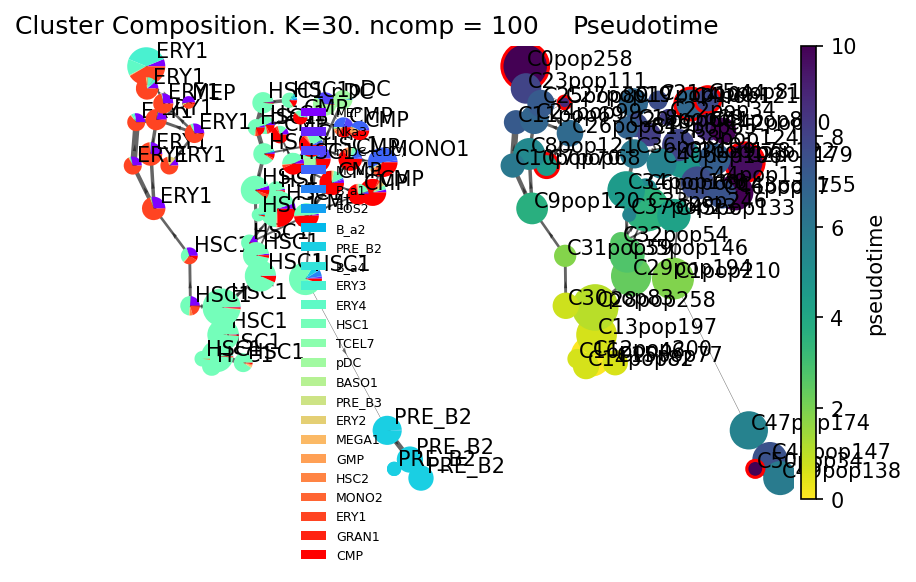

time elapsed 14.7 seconds


In [16]:
v1 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
             too_big_factor=0.05, root_user=root_user,
             x_lazy=0.95, alpha_teleport=0.99, dataset='', preserve_disconnected=True,
             super_terminal_clusters=v0.terminal_clusters, is_coarse=False,
             random_seed=v0_random_seed, pseudotime_threshold_TS=10, via_coarse=v0)
v1.run_VIA()

### We show the gene trends as a function of pseudotime for a selection of marker genes

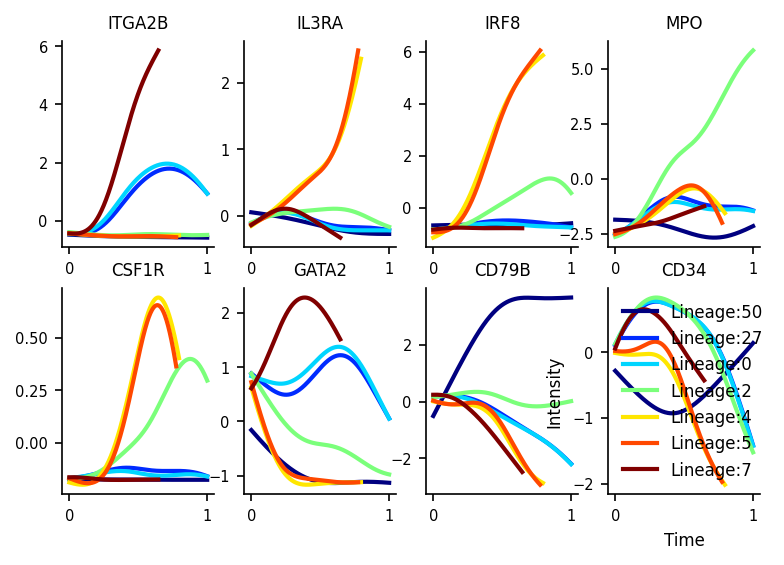

In [17]:
v1.get_gene_expression(df_magic[marker_genes])

dict of terminal state pairs, Super: sub:  {5: 50, 6: 27, 9: 0, 11: 2, 13: 4, 14: 5, 16: 7}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 5 is a super terminal with sub_terminal cluster 50
super cluster 6 is a super terminal with sub_terminal cluster 27
super cluster 9 is a super terminal with sub_terminal cluster 0
super cluster 11 is a super terminal with sub_terminal cluster 2
super cluster 13 is a super terminal with sub_terminal cluster 4
super cluster 14 is a super terminal with sub_terminal cluster 5
super cluster 16 is a super terminal with sub_terminal cluster 7


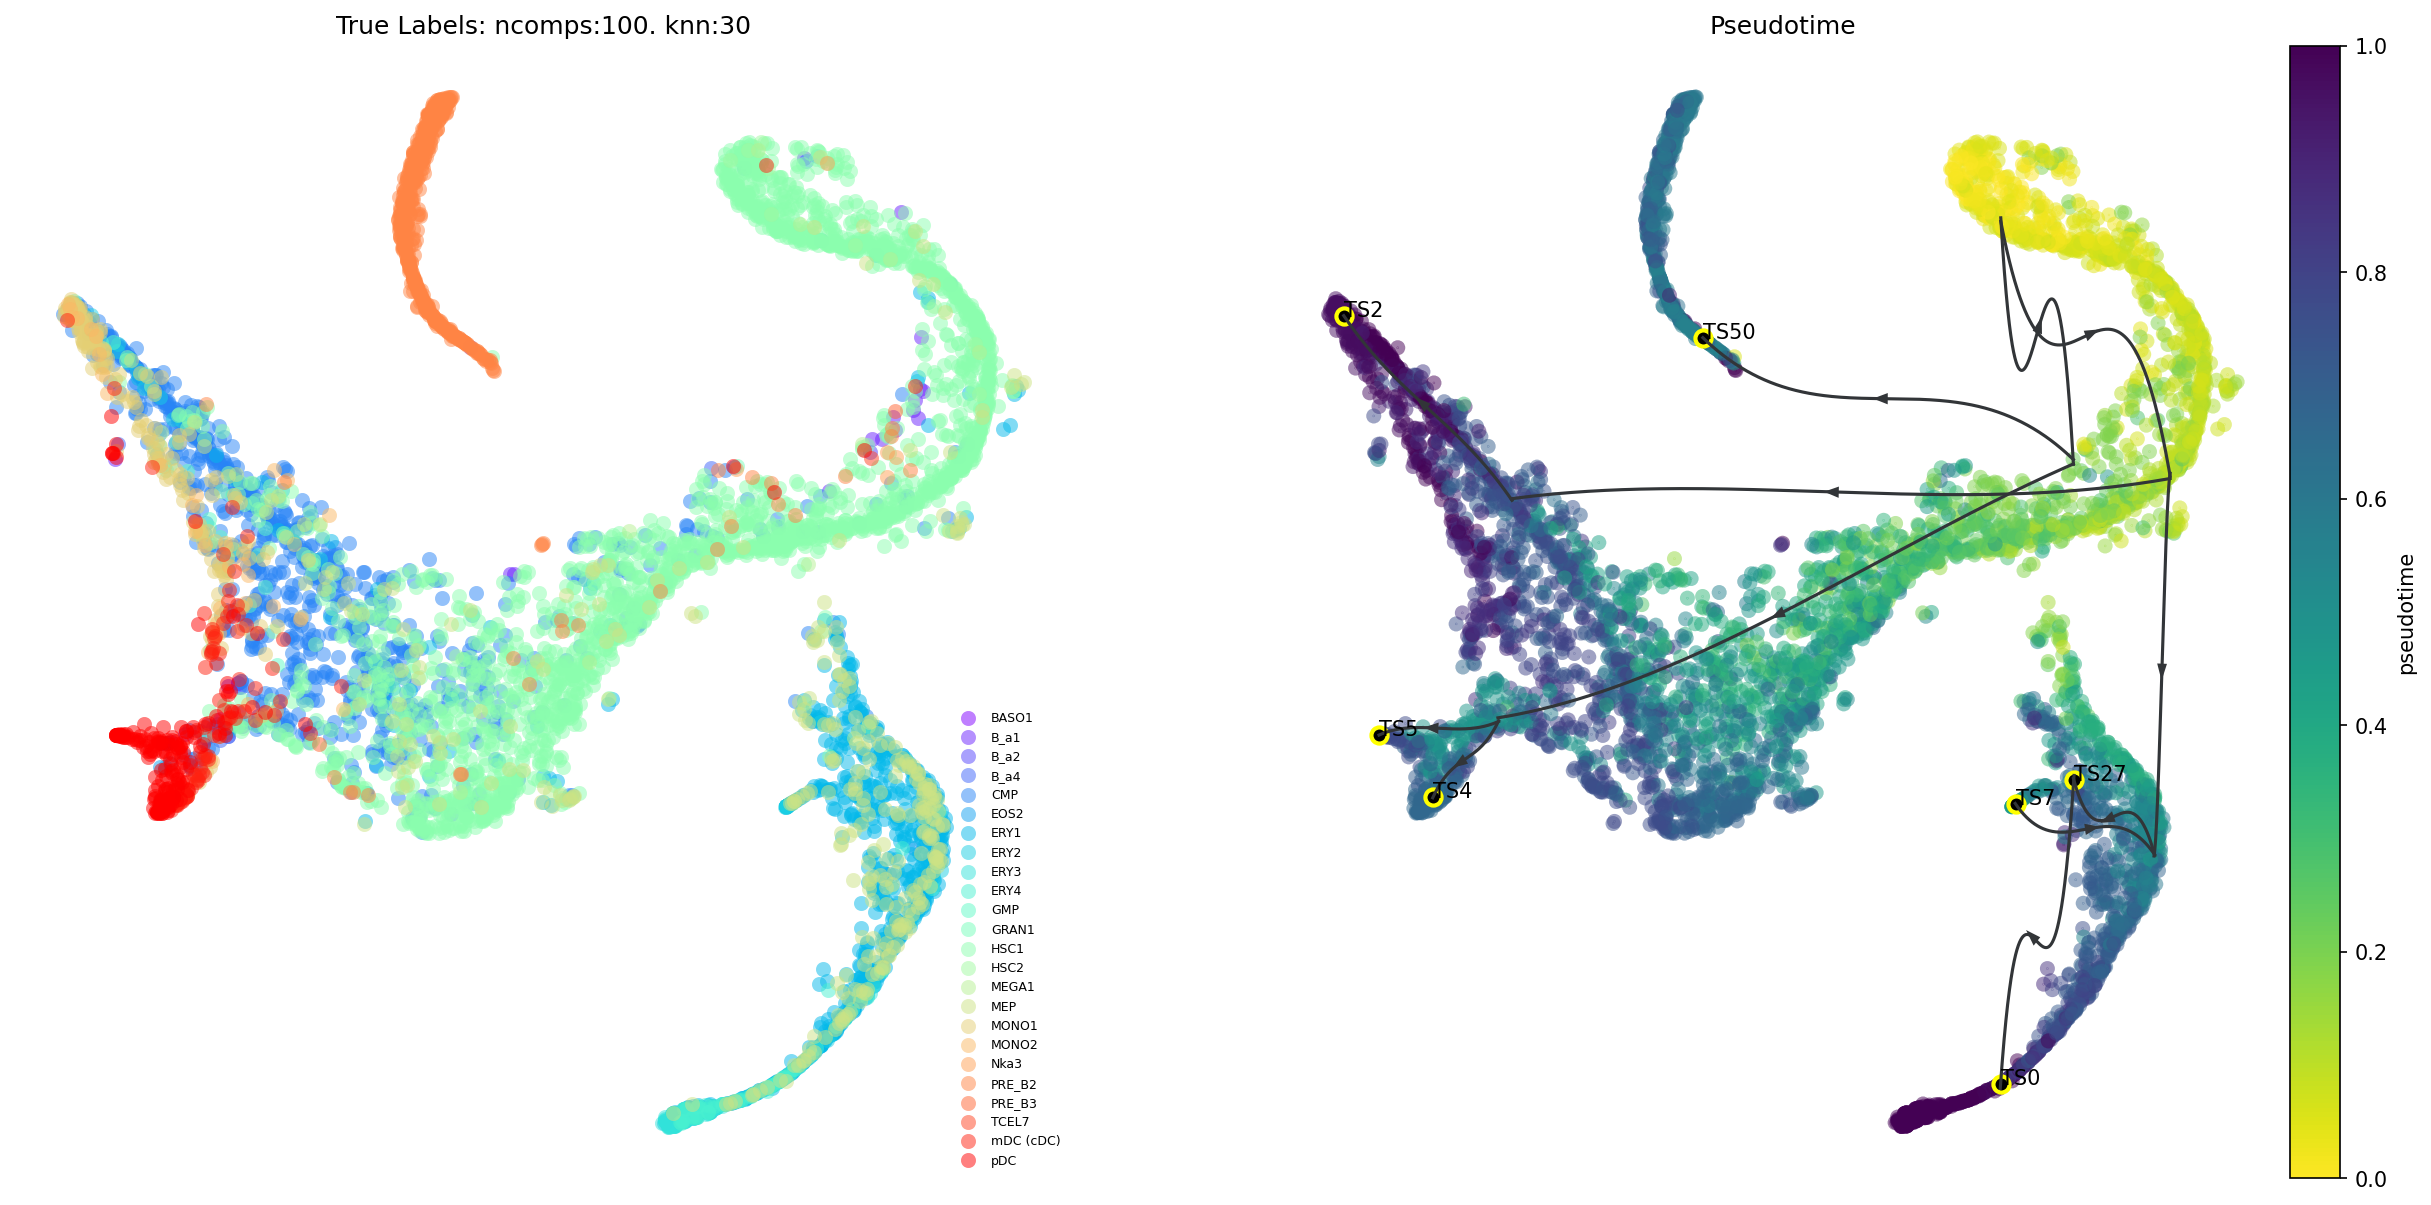

In [18]:
via.draw_trajectory_gams(via_coarse=v0, via_fine=v1, embedding=tsnem, draw_all_curves=False)